Датасет: https://ods.ai/competitions/competition-recsys-21

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 7)
plt.rcParams.update({'font.size': 12})

In [2]:
users = pd.read_csv('data/users.csv')
items = pd.read_csv('data/items.csv')
interactions = pd.read_csv('data/interactions.csv')

##### Анализ Users

In [3]:
display(users.head())

print("\nОбщая информация о users:")
users.info()

print("\nПроверка на наличие пропусков:")
print(users.isnull().sum())

print(f"Количество полных дубликатов: {users.duplicated().sum()}")

print(f"Количество дубликатов по user_id: {users.duplicated(subset=['user_id']).sum()}")

,user_id,age,income,sex,kids_flg
0,973171,age_25_34,income_60_90,М,1
1,962099,age_18_24,income_20_40,М,0
2,1047345,age_45_54,income_40_60,Ж,0
3,721985,age_45_54,income_20_40,Ж,0
4,704055,age_35_44,income_60_90,Ж,0



Общая информация о users:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840197 entries, 0 to 840196
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   user_id   840197 non-null  int64 
 1   age       826102 non-null  object
 2   income    825421 non-null  object
 3   sex       826366 non-null  object
 4   kids_flg  840197 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 32.1+ MB

Проверка на наличие пропусков:
user_id         0
age         14095
income      14776
sex         13831
kids_flg        0
dtype: int64
Количество полных дубликатов: 0
Количество дубликатов по user_id: 0


In [4]:
for col in ['age', 'sex', 'income', 'kids_flg']:
    print(f"{col}: {users[col].unique()}")

age: ['age_25_34' 'age_18_24' 'age_45_54' 'age_35_44' nan 'age_55_64'
 'age_65_inf']
sex: ['М' 'Ж' nan]
income: ['income_60_90' 'income_20_40' 'income_40_60' 'income_0_20' nan
 'income_90_150' 'income_150_inf']
kids_flg: [1 0]


1. Объем данных:
    - В датасете содержится информация о 840,197 пользователях. 
2. Уникальность пользователей:
    - Столбец user_id не имеет пропусков
    - Полные дубликаты отсутствуют
    - Дубликаты по user_id также отсутствуют. Это подтверждает, что каждая строка в файле соответствует уникальному пользователю, и user_id можно использовать как первичный ключ == может использоваться для объединения с другими таблицами -> Нет необходимости в удалении дубликатов.
3. Пропущенные значения (Проблема №1):
    - В трех ключевых демографических столбцах — age, income и sex — есть значительное количество пропусков (около 14-15 тысяч в каждом). Удаление этих строк приведет к потере ~5% пользователей, что нежелательно. Эти пропуски необходимо обработать
    - user_id и kids_flg имеют корректный числовой тип (int64).
4. Типы данных:
    - age, income, sex имеют тип object (строка), что соответствует описанию. Это категориальные признаки.
    - Вывод .unique() показывает, что значения в категориальных столбцах соответствуют описанию датасета (например, age_25_34, income_60_90, М, Ж). Аномальных или "мусорных" значений не видно, кроме nan.

##### Анализ items

In [5]:
display(items.head())

print("\nОбщая информация о items:")
items.info()

print("\nПроверка на наличие пропусков:")
print(items.isnull().sum())

print(f"Количество полных дубликатов: {items.duplicated().sum()}")
print(f"Количество дубликатов по item_id: {items.duplicated(subset=['item_id']).sum()}")

,item_id,content_type,title,title_orig,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,10711,film,Поговори с ней,Hable con ella,2002.0,"драмы, зарубежные, детективы, мелодрамы",Испания,NaN,16.0,NaN,Педро Альмодовар,"Адольфо Фернандес, Ана Фернандес, Дарио Гранди...",Мелодрама легендарного Педро Альмодовара «Пого...,"Поговори, ней, 2002, Испания, друзья, любовь, ..."
1,2508,film,Голые перцы,Search Party,2014.0,"зарубежные, приключения, комедии",США,NaN,16.0,NaN,Скот Армстронг,"Адам Палли, Брайан Хаски, Дж.Б. Смув, Джейсон ...",Уморительная современная комедия на популярную...,"Голые, перцы, 2014, США, друзья, свадьбы, прео..."
2,10716,film,Тактическая сила,Tactical Force,2011.0,"криминал, зарубежные, триллеры, боевики, комедии",Канада,NaN,16.0,NaN,Адам П. Калтраро,"Адриан Холмс, Даррен Шалави, Джерри Вассерман,...",Профессиональный рестлер Стив Остин («Все или ...,"Тактическая, сила, 2011, Канада, бандиты, ганг..."
3,7868,film,45 лет,45 Years,2015.0,"драмы, зарубежные, мелодрамы",Великобритания,NaN,16.0,NaN,Эндрю Хэй,"Александра Риддлстон-Барретт, Джеральдин Джейм...","Шарлотта Рэмплинг, Том Кортни, Джеральдин Джей...","45, лет, 2015, Великобритания, брак, жизнь, лю..."
4,16268,film,Все решает мгновение,NaN,1978.0,"драмы, спорт, советские, мелодрамы",СССР,NaN,12.0,Ленфильм,Виктор Садовский,"Александр Абдулов, Александр Демьяненко, Алекс...",Расчетливая чаровница из советского кинохита «...,"Все, решает, мгновение, 1978, СССР, сильные, ж..."



Общая информация о items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15963 entries, 0 to 15962
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   item_id       15963 non-null  int64  
 1   content_type  15963 non-null  object 
 2   title         15963 non-null  object 
 3   title_orig    11218 non-null  object 
 4   release_year  15865 non-null  float64
 5   genres        15963 non-null  object 
 6   countries     15926 non-null  object 
 7   for_kids      566 non-null    float64
 8   age_rating    15961 non-null  float64
 9   studios       1065 non-null   object 
 10  directors     14454 non-null  object 
 11  actors        13344 non-null  object 
 12  description   15961 non-null  object 
 13  keywords      15540 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 1.7+ MB

Проверка на наличие пропусков:
item_id             0
content_type        0
title               0
title_orig     

1. Объем данных и уникальность:
    - В каталоге содержится 15,963 уникальных единиц контента (фильмов/сериалов).
    - Столбец item_id не имеет пропусков и дубликатов -> это надежный первичный ключ для объединения таблиц.
2. Пропущенные значения:
    - studios: пропущено 93% данных (14898 из 15963). Этот признак практически бесполезен. Его придется удалить
    - for_kids: пропущено 96% данных. Возможно, NaN здесь означает "не для детей" (т.е., 0)
    - title_orig (оригинальное название): ~30% пропусков -> у советских/российских фильмов его может и не быть.
    - directors и actors: 10-16% пропусков. Эти данные важны для контентных рекомендаций, и пропуски нужно будет обработать.
    - Небольшое количество пропусков: release_year, countries, age_rating, description, keywords. Эти пропуски легко обработать
3. Типы данных (Требуют коррекции):
    - release_year, for_kids, age_rating имеют тип float64. После заполнения пропусков эти столбцы нужно будет преобразовать в целочисленный тип int, так как год, флаг и рейтинг не могут быть дробными.
4. Содержимое признаков (Требуют парсинга):
    - Столбцы genres, countries, directors, actors, keywords содержат строки со списками значений, разделенных запятыми. Для построения контентных признаков эти строки потребуется распарсить.


##### Анализ interactions

In [7]:
display(interactions.head())

print("\nОбщая информация о interactions:")
interactions.info()

print("\nПроверка на наличие пропусков:")
print(interactions.isnull().sum())

print(f"Количество полных дубликатов: {interactions.duplicated().sum()}")
print("\nСтатистика по числовым столбцам:")
display(interactions.describe())

,user_id,item_id,last_watch_dt,total_dur,watched_pct
0,176549,9506,2021-05-11,4250,72.0
1,699317,1659,2021-05-29,8317,100.0
2,656683,7107,2021-05-09,10,0.0
3,864613,7638,2021-07-05,14483,100.0
4,964868,9506,2021-04-30,6725,100.0



Общая информация о interactions:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5476251 entries, 0 to 5476250
Data columns (total 5 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        int64  
 1   item_id        int64  
 2   last_watch_dt  object 
 3   total_dur      int64  
 4   watched_pct    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 208.9+ MB

Проверка на наличие пропусков:
user_id            0
item_id            0
last_watch_dt      0
total_dur          0
watched_pct      828
dtype: int64
Количество полных дубликатов: 0

Статистика по числовым столбцам:


,user_id,item_id,total_dur,watched_pct
count,5.476251e+06,5.476251e+06,5.476251e+06,5.475423e+06
mean,5.491159e+05,8.485860e+03,8.295490e+03,4.637400e+01
std,3.166077e+05,4.740762e+03,4.856799e+04,4.191853e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,2.750140e+05,4.326000e+03,3.710000e+02,4.000000e+00
50%,5.493640e+05,8.776000e+03,2.898000e+03,3.200000e+01
75%,8.227540e+05,1.254400e+04,7.116000e+03,1.000000e+02
max,1.097557e+06,1.651800e+04,8.041167e+07,1.000000e+02


1. Объем данных:
    - Таблица содержит почти 5.5 миллионов записей о взаимодействиях
    - Каждая строка представляет собой уникальное взаимодействие между одним пользователем (user_id) и одной единицей контента (item_id).
    - Полные дубликаты отсутствуют
2. Пропущенные значения:
    - Ключевые столбцы user_id, item_id, last_watch_dt и total_dur полностью заполнены
    - В столбце watched_pct (процент просмотра) есть всего 828 пропусков на 5.5 млн записей
3. Типы данных:
    - Столбец last_watch_dt имеет тип object. Eго необходимо преобразовать в datetime.
4. Анализ числовых признаков:
    - total_dur (общая длительность просмотра):
        - min: 1.0: Минимальная длительность просмотра — 1 секунда. Это могут быть случайные клики или очень короткие просмотры.
        - mean: 8295 (≈ 2.3 часа), 50% (медиана): 2898 (≈ 48 минут). Разница между средним и медианой говорит о сильно скошенном вправо распределении.
        - max: 8.04e+07 (более 80 миллионов секунд, что равно ~2.5 годам). Это выброс или аномалия в данных. Возможно, это ошибка логгирования или какой-то баг.
        - Этот признак содержит выбросы. Использовать его "как есть" в нельзя. Необходимо применить np.log1p или другие методы, чтобы уменьшить влияние выбросов.
    - watched_pct (процент просмотра):
        - min: 0.0, max: 100.0: Значения находятся в ожидаемом диапазоне.
        - mean: 46.3, 50% (медиана): 32.0: Средний процент просмотра выше медианы, что говорит о наличии большого количества просмотров, близких к 100%
        - 25%: 4.0: Четверть всех взаимодействий — это просмотры менее 4%. Это подтверждает гипотезу о большом количестве "случайных" или коротких просмотров.

Предобработка и объединение данных

In [3]:
users.drop_duplicates(subset=['user_id'], inplace=True)

sex_mode = users['sex'].mode()[0]
users['sex'] = users['sex'].fillna(sex_mode)
print(f"Размер users после чистки: {users.shape}")

fill_values_items = {
    'countries': 'unknown',
    'studios': 'unknown',
    'directors': 'unknown',
    'actors': 'unknown',
    'keywords': 'unknown',
    'for_kids': 0,
    'age_rating': items['age_rating'].mode()[0]
}
items.fillna(value=fill_values_items, inplace=True)

items['for_kids'] = items['for_kids'].astype(int)
items['age_rating'] = items['age_rating'].astype(int)
print(f"Размер items после чистки: {items.shape}")


interactions.drop_duplicates(inplace=True)
interactions['last_watch_dt'] = pd.to_datetime(interactions['last_watch_dt'])
print(f"Размер interactions после чистки: {interactions.shape}")

Размер users после чистки: (840197, 5)
Размер items после чистки: (15963, 14)
Размер interactions после чистки: (5476251, 5)


- Таблица users: Пропуски в столбце sex были заполнены модальным значением (самым частым).
- Таблица items:
    - Для текстовых полей, описывающих контент (countries, studios, directors, actors, keywords), пропуски были заменены на строку "unknown".
    - Для флага for_kids пропуски были заменены на 0
    - Для age_rating пропуски были заполнены модальным значением.
    - Столбцы for_kids и age_rating были успешно преобразованы в целочисленный тип (int)
- Таблица interactions:
    - Столбец last_watch_dt был преобразован в формат даты и времени (datetime)


Объединение таблиц


In [4]:
full_df = pd.merge(interactions, users, on='user_id', how='left')
full_df = pd.merge(full_df, items, on='item_id', how='left')

print("Размер объединенного датафрейма:", full_df.shape)
display(full_df.head())

Размер объединенного датафрейма: (5476251, 22)


,user_id,item_id,last_watch_dt,total_dur,watched_pct,age,income,sex,kids_flg,content_type,...,release_year,genres,countries,for_kids,age_rating,studios,directors,actors,description,keywords
0,176549,9506,2021-05-11,4250,72.0,age_35_44,income_40_60,М,0.0,film,...,2013.0,"фэнтези, мультфильм, музыкальные",США,0,0,unknown,"Крис Бак, Дженнифер Ли","Кристен Белл, Идина Мензел, Джонатан Грофф, Дж...","Когда сбывается древнее предсказание, и короле...","королева, мюзикл, принцесса, предательство, сн..."
1,699317,1659,2021-05-29,8317,100.0,age_35_44,income_40_60,М,0.0,film,...,2014.0,"мультфильм, фэнтези, приключения, комедии",Россия,0,6,unknown,К. Феоктистов,"Сергей Маковецкий, Дмитрий Высоцкий, Дмитрий Н...",Придворный конь Гай Юлий Цезарь на свою беду п...,"2014, россия, три, богатыря, ход, конем"
2,656683,7107,2021-05-09,10,0.0,age_25_34,income_60_90,М,0.0,series,...,2021.0,"драмы, военные, приключения",Россия,0,12,unknown,Тимур Бекмамбетов,"Павел Прилучный, Павел Чинарёв, Тимофей Трибун...",Военно-исторический блокбастер от режиссёров Т...,unknown
3,864613,7638,2021-07-05,14483,100.0,age_65_inf,income_20_40,Ж,0.0,series,...,2018.0,мелодрамы,Россия,0,12,unknown,Ольга Перуновская,"Арина Постникова, Алексей Демидов, Евгения Нох...",Мишель получила свое необычное имя благодаря о...,unknown
4,964868,9506,2021-04-30,6725,100.0,age_25_34,income_20_40,Ж,0.0,film,...,2013.0,"фэнтези, мультфильм, музыкальные",США,0,0,unknown,"Крис Бак, Дженнифер Ли","Кристен Белл, Идина Мензел, Джонатан Грофф, Дж...","Когда сбывается древнее предсказание, и короле...","королева, мюзикл, принцесса, предательство, сн..."


#### Разведочный анализ данных (EDA)
##### Анализ пользователей


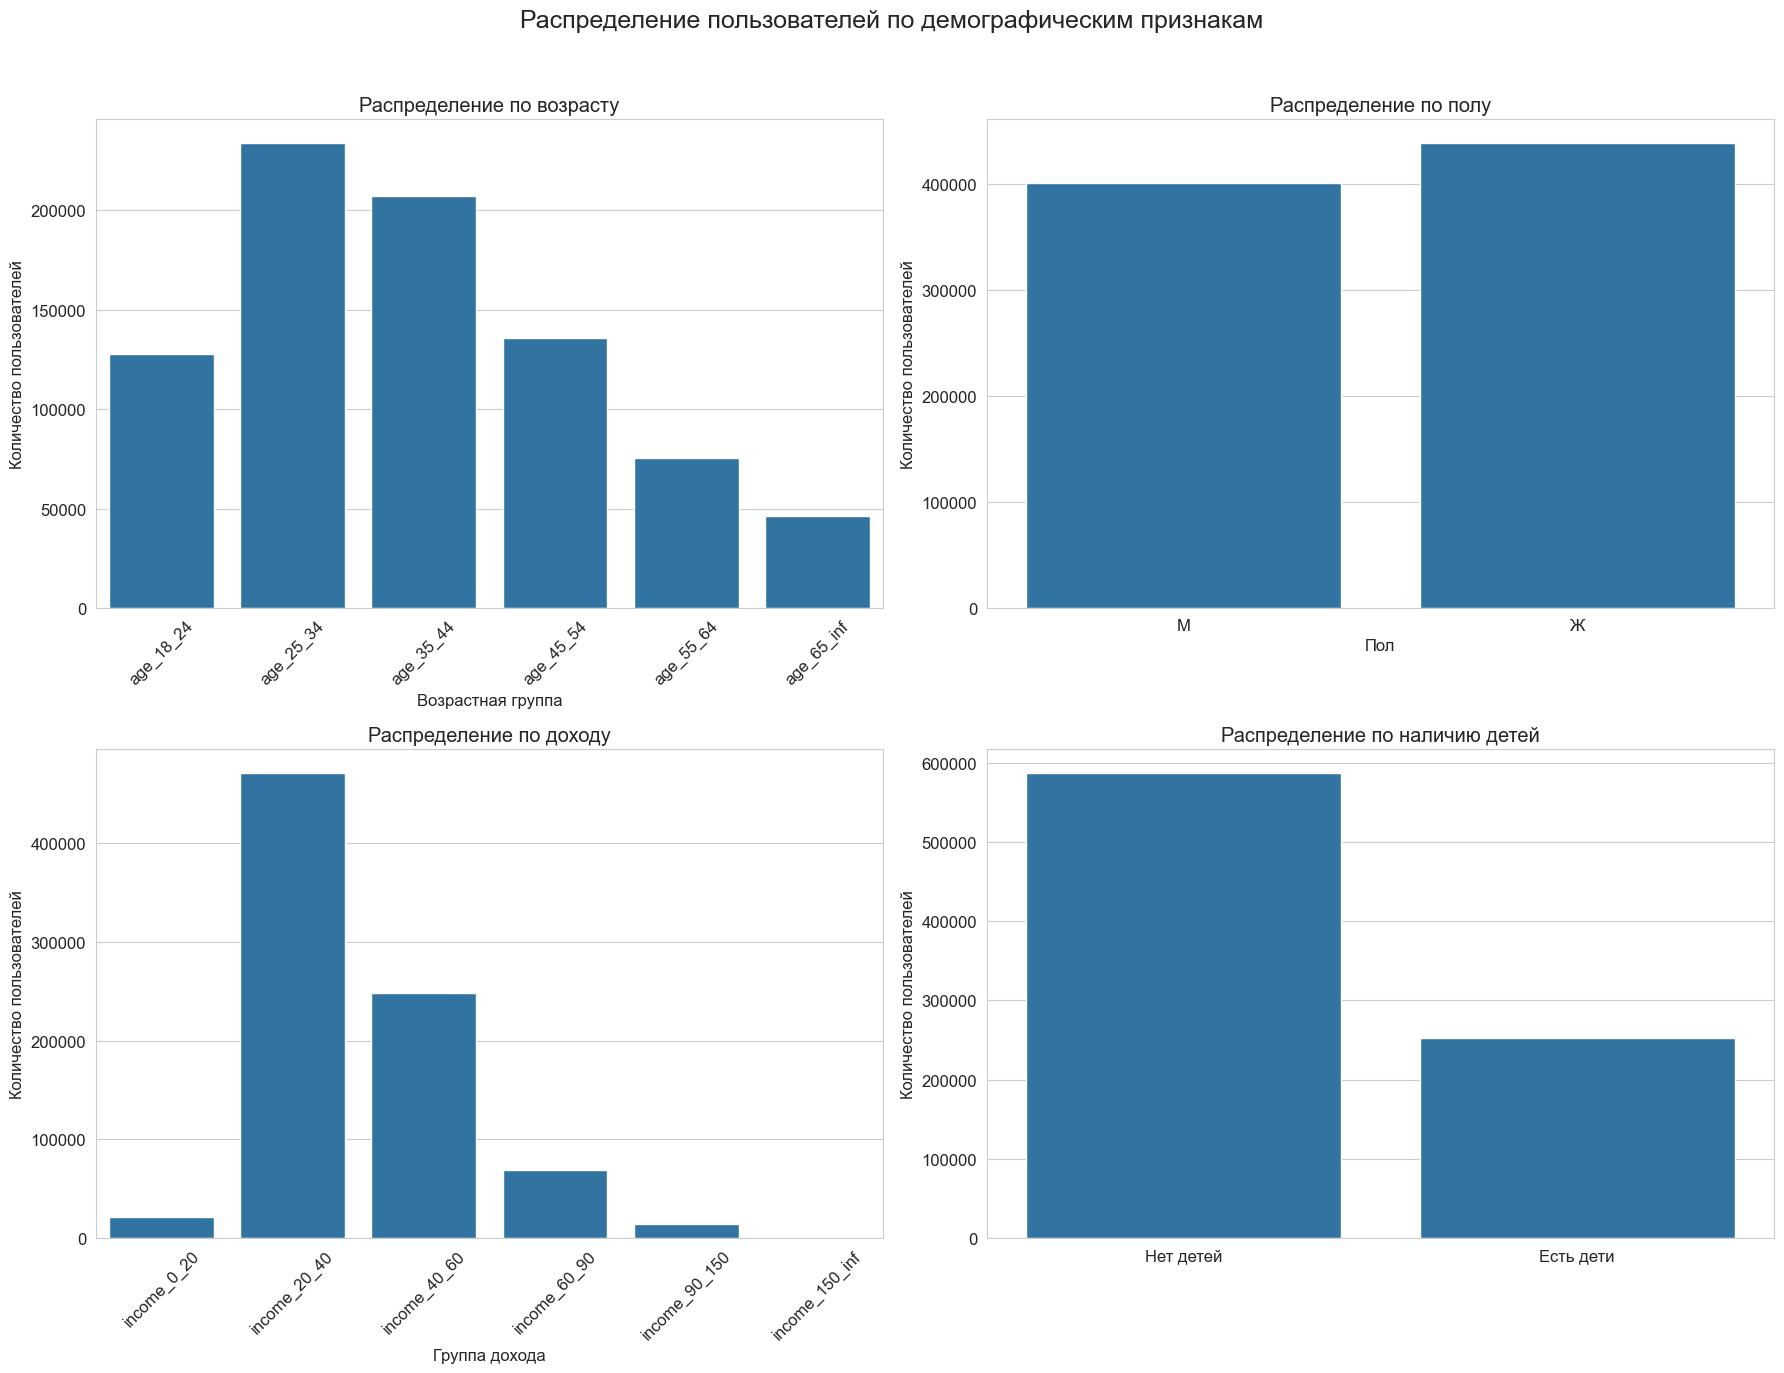

In [8]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))
fig.suptitle('Распределение пользователей по демографическим признакам', fontsize=18)

unique_ages = users['age'].unique()
unique_incomes = users['income'].unique()
age_order = sorted([age for age in unique_ages if pd.notna(age)])
income_order = [
    'income_0_20',
    'income_20_40',
    'income_40_60',
    'income_60_90',
    'income_90_150',
    'income_150_inf'
]

sns.countplot(ax=axes[0, 0], data=users, x='age', order=age_order)
axes[0, 0].set_title('Распределение по возрасту')
axes[0, 0].tick_params(axis='x', rotation=45)
axes[0, 0].set_xlabel('Возрастная группа')
axes[0, 0].set_ylabel('Количество пользователей')

sns.countplot(ax=axes[0, 1], data=users, x='sex')
axes[0, 1].set_title('Распределение по полу')
axes[0, 1].set_xlabel('Пол')
axes[0, 1].set_ylabel('Количество пользователей')

sns.countplot(ax=axes[1, 0], data=users, x='income', order=income_order)
axes[1, 0].set_title('Распределение по доходу')
axes[1, 0].tick_params(axis='x', rotation=45)
axes[1, 0].set_xlabel('Группа дохода')
axes[1, 0].set_ylabel('Количество пользователей')

sns.countplot(ax=axes[1, 1], data=users, x='kids_flg')
axes[1, 1].set_title('Распределение по наличию детей')
axes[1, 1].set_xticks([0, 1])
axes[1, 1].set_xticklabels(['Нет детей', 'Есть дети'])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('Количество пользователей')

plt.tight_layout(rect=(0, 0, 1, 0.96))
plt.show()

Интерпретация:
    - Возраст: Самые многочисленные группы пользователей — 25-34 и 35-44 года. Это ядро аудитории. Группы 18-24 и 45-54 также значимы. Аудитория старше 55 лет является наименее представленной, что может указывать либо на их низкий интерес к сервису, либо на потенциальную точку роста.
    - Пол: Мужчин и женщин на платформе примерно поровну, с небольшим преобладанием женщин. Это говорит о том, что сервис одинаково привлекателен для обоих полов.
    - Доход: Наиболее распространены группы с доходом 20-40 и 40-60 тыс. Распределение смещено в сторону более низких и средних доходов. Это может влиять на ценовую политику сервиса и выбор контента.
    - Наличие детей: У большинства пользователей (более 60%) нет детей. Это важный факт, который может влиять на популярность "семейного" или "детского" контента.


##### Анализ контента

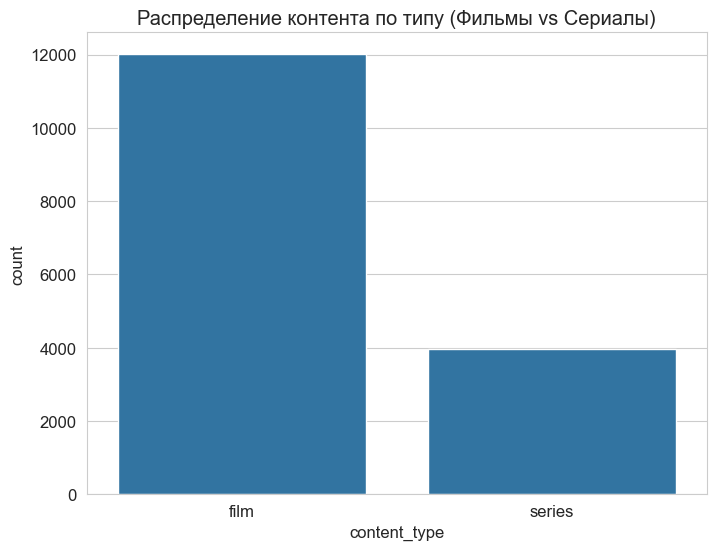

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(data=items, x='content_type')
plt.title('Распределение контента по типу (Фильмы vs Сериалы)')
plt.show()

 На платформе значительно больше фильмов, чем сериалов. Это говорит о том, что каталог сервиса исторически наполнялся в первую очередь полнометражным кино.


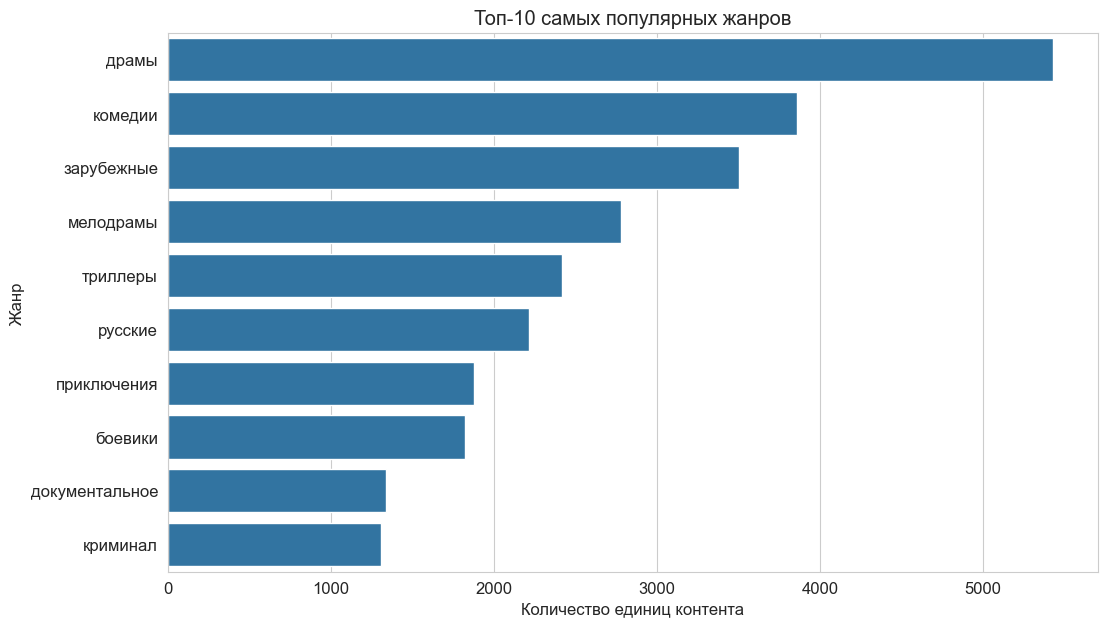

In [10]:
genres_s = items['genres'].str.split(', ').explode()
top_10_genres = genres_s.value_counts().nlargest(10)

plt.figure(figsize=(12, 7))
sns.barplot(y=top_10_genres.index, x=top_10_genres.values, orient='h')
plt.title('Топ-10 самых популярных жанров')
plt.xlabel('Количество единиц контента')
plt.ylabel('Жанр')
plt.show()

Самыми популярными жанрами являются драмы, комедии и зарубежные. Также в топе находятся мелодрамы, триллеры и русские. Это совпадает с общими предпочтениями массовой аудитории

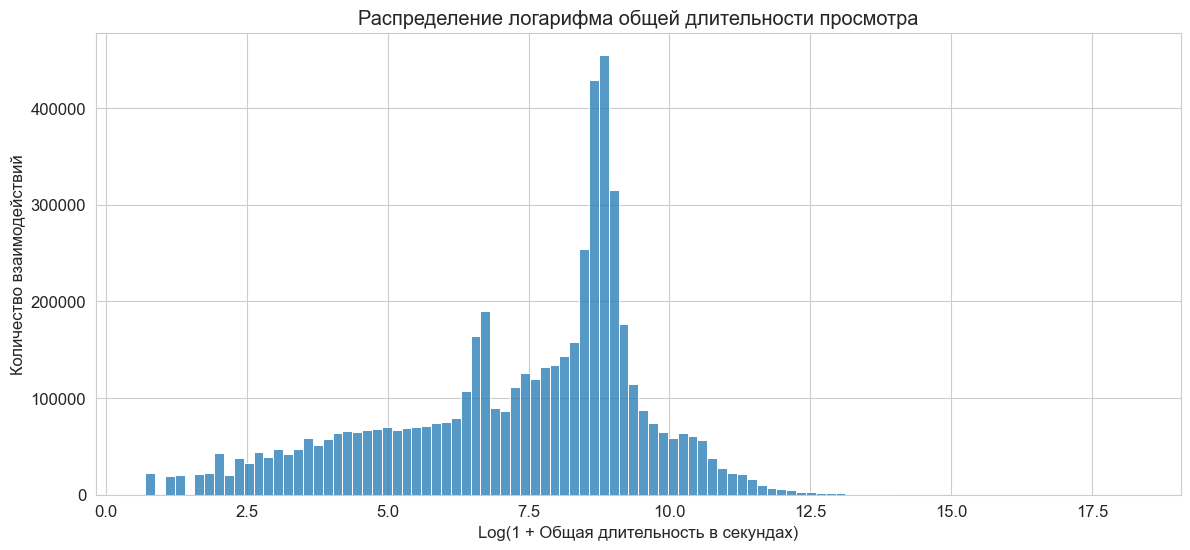

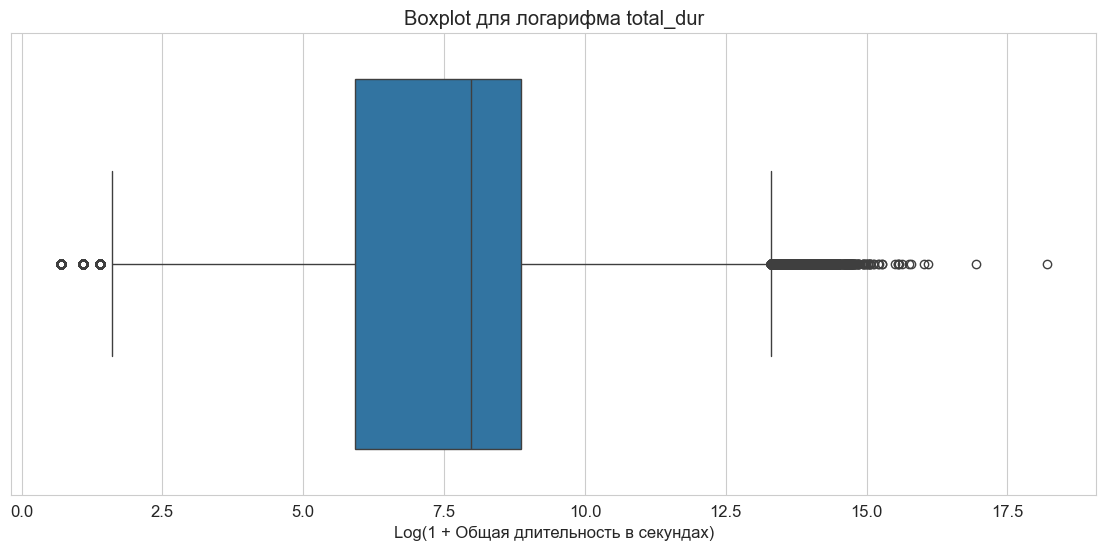

In [9]:
import numpy as np

log_total_dur = np.log1p(full_df['total_dur'])

plt.figure(figsize=(14, 6))
sns.histplot(log_total_dur, bins=100)
plt.title('Распределение логарифма общей длительности просмотра')
plt.xlabel('Log(1 + Общая длительность в секундах)')
plt.ylabel('Количество взаимодействий')
plt.show()

plt.figure(figsize=(14, 6))
sns.boxplot(x=log_total_dur)
plt.title('Boxplot для логарифма total_dur')
plt.xlabel('Log(1 + Общая длительность в секундах)')
plt.show()

- Гистограмма: Распределение total_dur сильно смещено вправо. Использование логарифмической шкалы показывает несколько пиков. Один пик в районе (вероятно, короткие просмотры, трейлеры или не досмотренные эпизоды/фильмы) и второй, более крупный пик (что соответствует длительности полнометражного фильма, 80-160 минут).
- Boxplot: Подтверждает наличие огромного количества выбросов — просмотров с аномально большой длительностью. Это могут быть ошибки в данных (например, пользователь не выключил плеер) или специфическое поведение (просмотр целого сезона сериала в рамках одной "сессии").


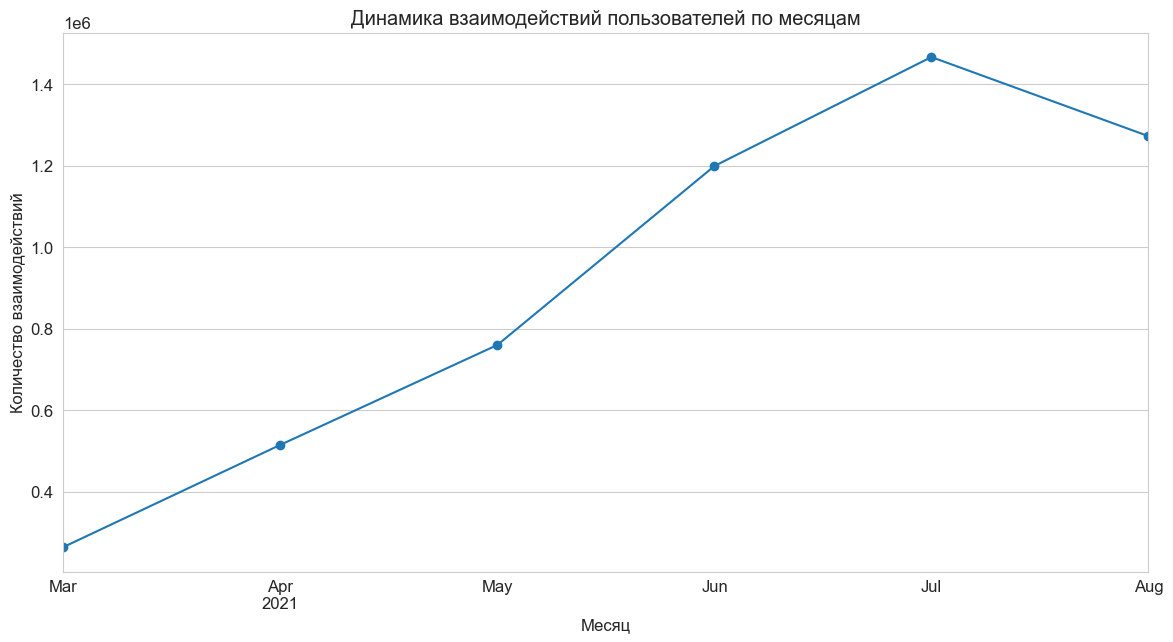

In [13]:
full_df['month'] = full_df['last_watch_dt'].dt.to_period('M')
monthly_activity = full_df.groupby('month')['user_id'].count()

plt.figure(figsize=(14, 7))
monthly_activity.plot(kind='line', marker='o')
plt.title('Динамика взаимодействий пользователей по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество взаимодействий')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Данные охватывают период с марта по август 2021 года. Наблюдается пик активности в июле.  
Возможные причины июльского пика: крупная премьера, маркетинговая кампания, внешние факторы, технические артефакты

##### Совместный анализ (Пользователи + Контент)

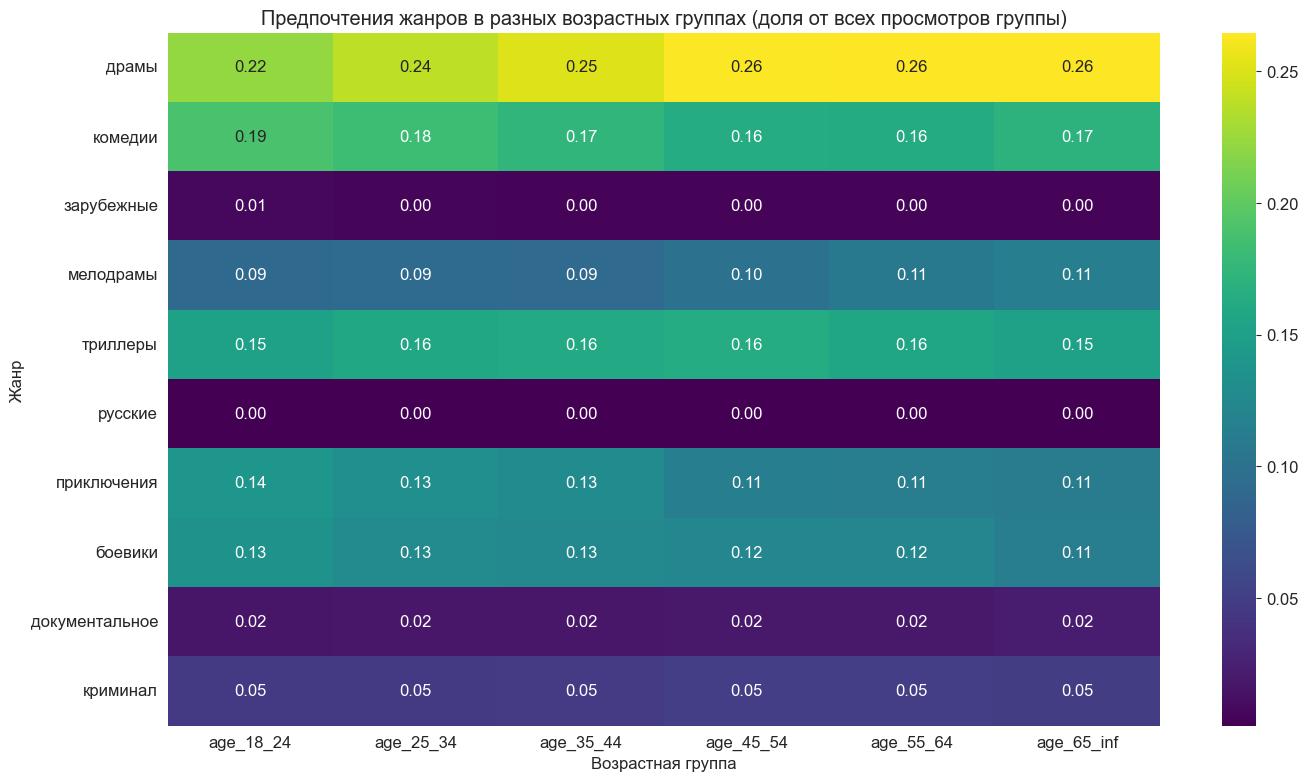

In [14]:
genres_by_age = full_df.dropna(subset=['age']).copy()

genres_by_age['genres'] = genres_by_age['genres'].str.split(', ')
genres_by_age = genres_by_age.explode('genres')
genres_by_age.rename(columns={'genres': 'genre'}, inplace=True)
genre_age_crosstab = pd.crosstab(genres_by_age['genre'], genres_by_age['age'])

top_genres_list = top_10_genres.index.to_list()
genre_age_crosstab_top = genre_age_crosstab.loc[top_genres_list]

genre_age_crosstab_norm = genre_age_crosstab_top.div(genre_age_crosstab_top.sum(axis=0), axis=1)

plt.figure(figsize=(16, 9))
sns.heatmap(genre_age_crosstab_norm, cmap='viridis', annot=True, fmt=".2f")
plt.title('Предпочтения жанров в разных возрастных группах (доля от всех просмотров группы)')
plt.xlabel('Возрастная группа')
plt.ylabel('Жанр')
plt.show()

- Общие тренды: Драмы, комедии и триллеры популярны во всех возрастных группах.
- Молодежь (18-24): Проявляет повышенный интерес к боевикам и приключениям по сравнению с другими группами.

#### Построение моделей рекомендаций


In [8]:
import scipy.sparse as sparse
from implicit.als import AlternatingLeastSquares
from implicit.nearest_neighbours import ItemItemRecommender
from pprint import pprint

In [21]:
model_df = interactions.copy()
model_df['user_id_cat'] = model_df['user_id'].astype("category")
model_df['item_id_cat'] = model_df['item_id'].astype("category")
model_df['user_idx'] = model_df['user_id_cat'].cat.codes
model_df['item_idx'] = model_df['item_id_cat'].cat.codes

user_id_map = dict(zip(model_df['user_idx'], model_df['user_id']))
item_id_map = dict(zip(model_df['item_idx'], model_df['item_id']))
user_idx_map = dict(zip(model_df['user_id'], model_df['user_idx']))
item_idx_map = dict(zip(model_df['item_id'], model_df['item_idx']))

print(f"Количество уникальных пользователей: {len(user_id_map)}")
print(f"Количество уникального контента: {len(item_id_map)}")

Количество уникальных пользователей: 962179
Количество уникального контента: 15706


In [17]:
confidence = np.log1p(model_df['total_dur'].values)

user_item_matrix = sparse.csr_matrix((confidence,
(model_df['user_idx'].values,
model_df['item_idx'].values)),
shape=(model_df['user_idx'].nunique(),
model_df['item_idx'].nunique()))
item_user_matrix = user_item_matrix.T.tocsr()

display(user_item_matrix)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 5476251 stored elements and shape (962179, 15706)>

- Общее число возможных взаимодействий: 962,179 пользователей * 15,706 фильмов ≈ 15.1 миллиарда

- Число реальных взаимодействий: 5,476,251

- Плотность матрицы (Sparsity): (5,476,251 / 15,108,550,574) * 100% ≈ 0.036%

##### MostPopular

In [25]:
item_popularity = interactions.groupby('item_id')['user_id'].count().sort_values(ascending=False)
most_popular_items = item_popularity.head(10).index.tolist()

print("Топ-10 самых популярных фильмов:")
display(items[items['item_id'].isin(most_popular_items)][['title', 'genres', 'content_type']])

Топ-10 самых популярных фильмов:


,title,genres,content_type
202,Афера,комедии,series
767,Клиника счастья,"драмы, мелодрамы",series
1882,Хрустальный,"триллеры, детективы",series
3875,Дуров,документальное,film
6346,Гнев человеческий,"боевики, триллеры",film
6501,Девятаев,"драмы, военные, приключения",film
6689,Секреты семейной жизни,комедии,series
12050,Прабабушка легкого поведения,комедии,film
13615,Подслушано,"драмы, триллеры",series
15234,Маша,"драмы, триллеры",film


 Модель рекомендует самые "засмотренные" хиты. Это в основном популярные русскоязычные сериалы и фильмы. Такая рекомендация не персонализирована, но может быть полезна для новых пользователей, у которых еще нет истории просмотров.

 ##### Item-based KNN

In [25]:
model_itemknn = ItemItemRecommender(K=20)
model_itemknn.fit(item_user_matrix)

  0%|          | 0/962179 [00:00<?, ?it/s]

In [70]:
def get_recommendations(user_id, model, matrix, n=100):
    user_idx = user_idx_map.get(user_id)
    if user_idx is None:
        print("Такого пользователя нет в данных.")
        return [], []
    
    recommended_indices, scores = model.recommend(
        user_idx, 
        matrix[user_idx], 
        N=n, 
        filter_already_liked_items=True
    )
    
    rec_item_ids = [item_id_map.get(idx) for idx in recommended_indices]
    rec_item_ids = [i for i in rec_item_ids if i is not None]
    
    if not rec_item_ids:
        return [], []
    
    rec_items_df = pd.DataFrame({'item_id': rec_item_ids})
    rec_items_df = rec_items_df.merge(items[['item_id', 'title']], on='item_id', how='left')
    
    return rec_items_df['item_id'].tolist(), rec_items_df['title'].tolist()


In [80]:
example_user_id = interactions['user_id'].sample(1).iloc[0] #664900
print(f"Пример рекомендаций для пользователя: {example_user_id}\n")

user_watched_items = interactions[interactions['user_id'] == example_user_id]['item_id']
print("Пользователь смотрел:")
display(items[items['item_id'].isin(user_watched_items)][['title', 'genres']].head())

itemknn_recs_ids, itemknn_recs_titles = get_recommendations(example_user_id, model_itemknn, user_item_matrix)
print("\nРекомендации от ItemKNN:")
pprint(itemknn_recs_titles)

Пример рекомендаций для пользователя: 664900

Пользователь смотрел:


,title,genres
1192,Повелитель бури,"драмы, триллеры, военные"
1588,Блиндаж,"драмы, военные"
1849,100% волк,"мультфильм, приключения, семейное, фэнтези, ко..."
2546,Спасти Ленинград,"историческое, драмы, военные, мелодрамы, боевики"
3857,28 панфиловцев,"драмы, историческое, военные"



Рекомендации от ItemKNN:
['Пила 4', 'Третья волна зомби', 'Госпожа горничная', 'Сигнал', 'Пассажиры']


Рекомендации становятся персонализированными. Модель предлагает контент, похожий на тот, что пользователь уже смотрел. Например, если пользователь смотрел несколько боевиков, модель порекомендует другие популярные боевики.

##### ALS (Alternating Least Squares)

In [82]:
model_als = AlternatingLeastSquares(factors=64,
regularization=0.01,
iterations=15,
calculate_training_loss=True,
random_state=42)

model_als.fit(user_item_matrix)

als_recs_ids, als_recs_titles = get_recommendations(example_user_id, model_als, user_item_matrix)

print(f"Снова смотрим на историю пользователя: {example_user_id}")
display(items[items['item_id'].isin(user_watched_items)][['title', 'genres']].head())

print("\nРекомендации от ALS:")
print(als_recs_titles)

  0%|          | 0/15 [00:00<?, ?it/s]

Снова смотрим на историю пользователя: 664900


,title,genres
1192,Повелитель бури,"драмы, триллеры, военные"
1588,Блиндаж,"драмы, военные"
1849,100% волк,"мультфильм, приключения, семейное, фэнтези, ко..."
2546,Спасти Ленинград,"историческое, драмы, военные, мелодрамы, боевики"
3857,28 панфиловцев,"драмы, историческое, военные"



Рекомендации от ALS:
['Ржев', 'Бункер', 'Коридор бессмертия', 'Код 8', 'Балканский рубеж', 'Братство', 'Застава', 'Кавалерия', 'Собибор', 'Приказ "Уничтожить"', 'Легенда о коловрате', 'Альфа', 'Чёрная пантера', 'Герои. Закалённые северной широтой', 'Рядовой Чээрин', 'Пленный', 'Левша', 'Девятаев', 'Солдатик', 'Немцы', '1917', 'Крылья Урагана', 'Пальмира', 'Форма воды', 'Крейсер', 'Тайна Коко', 'На подвиг Отчизна зовёт', 'Остров проклятых', 'Три дня до весны', 'Покушение', 'Убийство онлайн', 'Дурак', 'Единичка', 'Джон Уик 3', 'День города', 'Ликвидация', 'Прощаться не будем', 'Эскадрилья  Лафайет', 'Без компромиссов', 'Убийство в Восточном экспрессе', 'Призраки войны', 'Стражи Галактики', 'Как Витька Чеснок вёз Лёху Штыря в дом инвалидов', 'Апгрейд', 'Перл Харбор', 'Осенью 41-го', 'Жажда', 'Дружить по-русски', 'Сталинград. Мы еще живы или нет?', 'Золото джунглей', 'Танки', 'Содержанки', 'Королевские каникулы', '12 лет рабства', 'Апостол', 'Во власти стихии', 'Алита: Боевой ангел', 'Кур

Модель способна улавливать более сложные зависимости, нежели KNN. Например, если пользователь смотрит фильмы определенного режиссера (даже разных жанров), ALS может найти латентный фактор, объединяющий эти предпочтения, и порекомендовать что-то новое.

#### Метрики и оценка качества моделей

Выбранные метрики:

1. Precision@k: Доля релевантных товаров среди k рекомендованных. Простая и понятная метрика, но не учитывает порядок рекомендаций.
2. NDCG@k (Normalized Discounted Cumulative Gain): Метрика, учитывающая ранжирование. Она дает больший вес релевантным товарам, которые находятся на верхних позициях в списке рекомендаций. Это одна из самых популярных метрик для оценки ранжирования.
3. Intra-list Similarity (ILS): Специфическая метрика для RecSys, которая оценивает разнообразие рекомендаций. Она вычисляет среднее попарное сходство между всеми товарами в рекомендационном списке.
    - Низкое значение ILS означает высокое разнообразие (рекомендуются непохожие товары).
    - Высокое значение ILS означает низкое разнообразие (рекомендуются очень похожие товары, например, 5 частей одного фильма).

In [6]:
from sklearn.metrics.pairwise import cosine_similarity
from tqdm import tqdm

K = 10

In [10]:
interactions['last_watch_dt'] = pd.to_datetime(interactions['last_watch_dt'])

split_date = pd.to_datetime('2021-08-01')
train_df = interactions[interactions['last_watch_dt'] < split_date]
test_df = interactions[interactions['last_watch_dt'] >= split_date]

test_users = test_df['user_id'].unique()
train_users = train_df['user_id'].unique()
test_users_in_train = np.intersect1d(test_users, train_users)
test_df = test_df[test_df['user_id'].isin(test_users_in_train)]

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"Количество пользователей для теста: {len(test_users_in_train)}")

Размер обучающей выборки: (4203885, 5)
Размер тестовой выборки: (757846, 5)
Количество пользователей для теста: 179903


In [13]:
split_date = pd.to_datetime('2021-08-01')

train_df = interactions[interactions['last_watch_dt'] < split_date].copy()
test_df = interactions[interactions['last_watch_dt'] >= split_date].copy()

test_users = test_df['user_id'].unique()
train_users = train_df['user_id'].unique()
test_users_in_train = np.intersect1d(test_users, train_users)
test_df = test_df.loc[test_df['user_id'].isin(test_users_in_train)].copy()

print(f"Размер обучающей выборки: {train_df.shape}")
print(f"Размер тестовой выборки: {test_df.shape}")
print(f"Количество пользователей для теста: {len(test_users_in_train)}")

train_df['user_idx'] = train_df['user_id'].map(user_idx_map)
train_df['item_idx'] = train_df['item_id'].map(item_idx_map)

train_confidence = np.log1p(train_df['total_dur'].values)

train_user_item_matrix = sparse.csr_matrix((train_confidence,
                                           (train_df['user_idx'].values,
                                            train_df['item_idx'].values)),
                                          shape=(len(user_idx_map),
                                                 len(item_idx_map)))

train_item_user_matrix = train_user_item_matrix.T.tocsr()

test_true_items = test_df.groupby('user_id')['item_id'].apply(list).to_dict()

Размер обучающей выборки: (4203885, 5)
Размер тестовой выборки: (757846, 5)
Количество пользователей для теста: 179903


##### MostPop

In [14]:
most_popular_items_train = train_df.groupby('item_id')['user_id'].count().sort_values(ascending=False).head(K).index.tolist()

#####  ItemKNN

In [15]:
model_itemknn_train = ItemItemRecommender(K=20)
model_itemknn_train.fit(train_item_user_matrix)

  0%|          | 0/962179 [00:00<?, ?it/s]

##### ALS

In [20]:
model_als_train = AlternatingLeastSquares(factors=64,
regularization=0.01,
iterations=15,
random_state=42)
model_als_train.fit(train_user_item_matrix)

item_factors_als = model_als_train.item_factors

  0%|          | 0/15 [00:00<?, ?it/s]

In [17]:
def precision_at_k(recommended_items, true_items, k):
    relevant_items = np.intersect1d(recommended_items, true_items)
    return len(relevant_items) / k

def dcg_at_k(recommended_items, true_items, k):
    recommended_items = recommended_items[:k]
    relevance = np.array([1 if item in true_items else 0 for item in recommended_items])
    if relevance.size == 0:
        return 0.0

    discounts = np.log2(np.arange(2, relevance.size + 2))
    return np.sum(relevance / discounts)

def ndcg_at_k(recommended_items, true_items, k):
    dcg = dcg_at_k(recommended_items, true_items, k)
    ideal_recs = true_items[:k]
    idcg = dcg_at_k(ideal_recs, true_items, k)
    return dcg / idcg if idcg > 0 else 0.0

def intra_list_similarity(recommended_items, item_factors, item_idx_map):
    rec_indices = [item_idx_map[i] for i in recommended_items if i in item_idx_map]
    if len(rec_indices) < 2:
        return 0.0
    
    vectors = item_factors[rec_indices]
    similarity_matrix = cosine_similarity(vectors)

    upper_triangle = similarity_matrix[np.triu_indices(len(rec_indices), k=1)]
    return np.mean(upper_triangle) if upper_triangle.size > 0 else 0.0

In [18]:
results = {
    'MostPop': {'precision': [], 'ndcg': [], 'ils': []},
    'ItemKNN': {'precision': [], 'ndcg': [], 'ils': []},
    'ALS': {'precision': [], 'ndcg': [], 'ils': []}
}

for user_id in tqdm(test_users_in_train):
    true_items = test_true_items.get(user_id, [])
    if not true_items:
        continue

    user_idx = user_idx_map.get(user_id)
    if user_idx is None:
        continue

    recs_pop = most_popular_items_train
    results['MostPop']['precision'].append(precision_at_k(recs_pop, true_items, K))
    results['MostPop']['ndcg'].append(ndcg_at_k(recs_pop, true_items, K))
    results['MostPop']['ils'].append(intra_list_similarity(recs_pop, item_factors_als, item_idx_map))

    indices_knn, scores_knn = model_itemknn_train.recommend(
        user_idx, train_user_item_matrix[user_idx], N=K, filter_already_liked_items=True
    )
    recs_knn = [item_id_map.get(idx) for idx in indices_knn if item_id_map.get(idx) is not None]
    
    results['ItemKNN']['precision'].append(precision_at_k(recs_knn, true_items, K))
    results['ItemKNN']['ndcg'].append(ndcg_at_k(recs_knn, true_items, K))
    results['ItemKNN']['ils'].append(intra_list_similarity(recs_knn, item_factors_als, item_idx_map))

    indices_als, scores_als = model_als_train.recommend(
        user_idx, train_user_item_matrix[user_idx], N=K, filter_already_liked_items=True
    )

    recs_als = [item_id_map.get(idx) for idx in indices_als if item_id_map.get(idx) is not None]

    results['ALS']['precision'].append(precision_at_k(recs_als, true_items, K))
    results['ALS']['ndcg'].append(ndcg_at_k(recs_als, true_items, K))
    results['ALS']['ils'].append(intra_list_similarity(recs_als, item_factors_als, item_idx_map))

summary_results = []
for model_name, metrics in results.items():
    summary_results.append({
        'Model': model_name,
        f'Precision@{K}': np.mean(metrics['precision']),
        f'NDCG@{K}': np.mean(metrics['ndcg']),
        f'Intra-List Similarity@{K}': np.mean(metrics['ils'])
    })

results_df = pd.DataFrame(summary_results)
display(results_df)

100%|██████████| 179903/179903 [03:57<00:00, 757.74it/s] 


,Model,Precision@10,NDCG@10,Intra-List Similarity@10
0,MostPop,0.045472,0.121032,0.060691
1,ItemKNN,0.000002,0.000006,0.009481
2,ALS,0.024628,0.053557,0.202219


1. Низкое качество ItemKNN:
    - Модель ItemKNN показывает метрики Precision и NDCG, которые практически равны нулю. Это означает, что она почти никогда не угадывает фильмы, которые пользователи реально смотрят в тестовом периоде.
    - Возможная причина: ItemKNN очень хорошо находит "очевидных соседей". Скорее всего, все рекомендации, которые она генерирует, отфильтровываются как "уже просмотренные" (filter_already_liked_items=True), и в итоге модель возвращает пустые списки. В результате, в числителе метрик (len(relevant_items)) всегда стоит ноль. Низкое значение ILS (почти 0) также подтверждает, что списки рекомендаций часто были пустыми.
    - Вывод: В данной конфигурации (с сильной фильтрацией и для пользователей с большой историей) ItemKNN оказалась непригодной. 
2. Высокая эффективность MostPop (Baseline):
    - Простейшая модель MostPop показывает лучшие результаты по Precision и NDCG. Она угадывает релевантные фильмы чаще, чем ALS, и ставит их на более высокие позиции.
    - Интерпретация: поведение пользователей в тестовом периоде (август) очень сильно сконцентрировано вокруг нескольких хитов. Люди смотрят то, что популярно. Модель MostPop просто рекомендует эти хиты всем подряд и "попадает в цель" за счет массовости их просмотров.
    - Вывод:Для новых пользователей или в качестве "запасного" варианта рекомендации самых популярных фильмов — это очень сильная и эффективная стратегия.
3. Умеренная производительность ALS:
    -  ALS показывает результаты значительно хуже, чем MostPop, но лучше, чем ItemKNN. Она все-таки способна давать персонализированные и релевантные рекомендации.
    - Анализ разнообразия (ILS): ALS имеет самый высокий показатель Intra-List Similarity (0.202). Это означает, что ее рекомендации наименее разнообразны (наиболее похожи друг на друга) по сравнению с другими моделями. Это может быть связано с тем, что латентные факторы, которые она выучила, очень сильно группируют похожие фильмы вместе.
    - Противоречие: ALS должна давать более "неожиданные" рекомендации, но метрика ILS говорит об обратном. Это может быть связано с особенностями датасета

#### Предложения по улучшению качества рекомендаций и выводы

1. Более подробный сбор данных о взаимодействиях: сейчас у нас есть только total_dur. Мы не знаем, был ли просмотр прерван на середине, досмотрен ли фильм до конца, был ли он "перемотан". Необходимо внедрить сбор более детальных событий
2. Построение многоуровневой (двухэтапной) системы:
    - Быстрые модели (ALS, ItemKNN с большим N) отбирают широкий список из 100-200 потенциально интересных товаров для каждого пользователя.
    - Более сложная модель (например, градиентный бустинг — LightGBM, CatBoost) ранжирует этих 100-200 кандидатов, используя гораздо больше признаков (демографию пользователя, все атрибуты контента, популярность, время дня и т.д.), и выбирает итоговые топ-10.
3. Смешивать результаты разных моделей: ALS проигрывает MostPop, потому что не всегда улавливает "хайп". Можно Смешивать результаты разных моделей.
4. Что рекомендовать новому пользователю? Создать отдельную модель для новых пользователей на основе демографических данных.
5. Учет контекста: Рекомендации сейчас "статичны" и не зависят от ситуации. Добавить контекстуальные факторы (время суток, день недели, устройства)
6. Повышение разнообразия: Модели склонны замыкать пользователя в "пузыре предпочтений", рекомендуя одно и то же. Наш ALS показал высокий ILS. Искусственно вносить разнообразие в итоговый список. Например, убедиться, что в топ-10 рекомендаций не более 3 фильмов одного жанра или от одного режиссера.


##### Выводы

1. Простая модель — не значит плохая: Проведенный анализ показал, что в определенных условиях простейший неперсонализированный baseline (MostPop) может превзойти сложные модели.
2. Персонализация требует доработки: Модели ItemKNN и ALS показали свою работоспособность, но требуют дальнейшей настройки (подбор гиперпараметров, фильтрация данных) и правильного применения (например, в рамках двухэтапной системы)
3. Качество данных: Основные точки роста лежат в области улучшения и обогащения данных. Сбор более детальной обратной связи (лайки, полные просмотры) и обогащение каталога контента из внешних источников дадут наибольший прирост качества в долгосрочной перспективе.
4. Наилучшие результаты, как правило, достигаются не одной "идеальной" моделью, а гибридной системой, которая комбинирует сильные стороны разных подходови учитывает контекст пользователя.
